#### Importing Python Library/ Packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from pandas.io.json import json_normalize
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install beautifulsoup4
# conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup
import xml
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


#### Data Collection

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
page = requests.get(url) 
soup = BeautifulSoup(page.text)

#### Web scrapping to make database

In [4]:
table = soup.find_all('table')[4]
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
city_df = pd.DataFrame(res, columns=["Rank", "City", "State", "del1", "del2", "del3", "Sq.Area", "del5", "population density in Sq Mi", "Population density in Km2", "Location"])
city_df.head()

,Rank,City,State,del1,del2,del3,Sq.Area,del5,population density in Sq Mi,Population density in Km2,Location
0,1,New York[d],New York,"8,398,748","8,175,133",+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...
1,2,Los Angeles,California,"3,990,456","3,792,621",+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
2,3,Chicago,Illinois,"2,705,994","2,695,598",+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
3,4,Houston[3],Texas,"2,325,502","2,100,263",+10.72%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...
4,5,Phoenix,Arizona,"1,660,272","1,445,632",+14.85%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...


#### Dropping Unnecessary Columns

In [5]:
city_df.drop(columns = ["Rank", "del1", "del2", "del3", "del5", "population density in Sq Mi"], inplace = True)
city_df.head()

,City,State,Sq.Area,Population density in Km2,Location
0,New York[d],New York,301.5 sq mi,"10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...
1,Los Angeles,California,468.7 sq mi,"3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...
2,Chicago,Illinois,227.3 sq mi,"4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...
3,Houston[3],Texas,637.5 sq mi,"1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...
4,Phoenix,Arizona,517.6 sq mi,"1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...


In [6]:
new= city_df["Sq.Area"].str.split("s", n=1, expand = True)
new = new[0].str.replace(u'\xa0',u'')
city_df["Sq.Area"] = new.str.replace(',','')
city_df["Sq.Area"] = city_df["Sq.Area"].astype(float) #Changing datatype to Float
city_df["Radius"] = np.sqrt(city_df["Sq.Area"]) #Calculating Squareroot

city_df.drop(columns = ["Sq.Area"], inplace = True)
city_df.head()

,City,State,Population density in Km2,Location,Radius
0,New York[d],New York,"10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿...,17.363755
1,Los Angeles,California,"3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°...,21.649480
2,Chicago,Illinois,"4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿...,15.076472
3,Houston[3],Texas,"1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿...,25.248762
4,Phoenix,Arizona,"1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°...,22.750824


#### Latitude and Logitude of Cities

In [7]:
city_df["Location"]= city_df["Location"].str.split("/", n = 2, expand = True)[1]
new = city_df["Location"].str.split(" ", n = 0, expand = False)
k = city_df.copy(deep = True)
Latitude = []
Longitude = []
for i in range(len(new)):
    Latitude.append(new[i][1][:-2])
    Longitude.append(new[i][2][:-3]) 

k["Latitude"] = Latitude
k["Longitude"] = Longitude
k["Latitude"] = k["Latitude"].str.replace(u'\ufeff',u'')
k.drop(columns = ["Location"], inplace = True)
k.head()
city_df = k.copy(deep = True)
city_df['Longitude'] = -city_df['Longitude'].astype(float)
city_df['Latitude'] = city_df['Latitude'].astype(float)
city_df['Radius'] = city_df['Radius']* 1000
city_df.head()

,City,State,Population density in Km2,Radius,Latitude,Longitude
0,New York[d],New York,"10,933/km2",17363.755354,40.6635,-73.9387
1,Los Angeles,California,"3,276/km2",21649.480363,34.0194,-118.4108
2,Chicago,Illinois,"4,600/km2",15076.471736,41.8376,-87.6818
3,Houston[3],Texas,"1,395/km2",25248.762346,29.7866,-95.3909
4,Phoenix,Arizona,"1,200/km2",22750.824161,33.5722,-112.0901


#### Per capita income at Texas, USA

In [8]:
import csv

In [13]:
url = 'https://en.wikipedia.org/wiki/List_of_Texas_locations_by_per_capita_income'
page = requests.get(url)
page.text
soup = BeautifulSoup(page.text,'html.parser')

table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('income.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [14]:
income=pd.read_csv('income.csv')
income.head()

,Rank\n,County\n,Per capitaincome\n,Medianhouseholdincome\n,Medianfamilyincome\n,Population\n,Number ofhouseholds\n
0,1\n,Loving\n,"$42,220\n","$83,889\n","$84,306\n",82\n,39\n
1,2\n,Borden\n,"$40,916\n","$58,409\n","$60,536\n",641\n,264\n
2,3\n,King\n,"$39,511\n","$61,563\n","$80,500\n",286\n,113\n
3,4\n,Collin\n,"$37,362\n","$80,504\n","$94,785\n","782,341\n","283,759\n"
4,5\n,Kendall\n,"$36,418\n","$66,655\n","$80,801\n","33,410\n","12,617\n"


#### Post-processing of the Database

In [16]:
income.columns = income.columns.str.replace(' ', '')
income.columns = income.columns.str.replace('\'','')
income.rename(columns = {'Rank\n' : 'Rank',
                   'County\n':'County',
                   'Percapitaincome\n':'Per_capita_income',
                   'Medianhouseholdincome\n':'Med_house_income',
                    'Medianfamilyincome\n':'Med_family_income',
                    'Population\n':'Population',
                    'Numberofhouseholds\n':'No_of_household'}, inplace=True)
income.head()

,Rank,County,Per_capita_income,Med_house_income,Med_family_income,Population,No_of_household
0,1\n,Loving\n,"$42,220\n","$83,889\n","$84,306\n",82\n,39\n
1,2\n,Borden\n,"$40,916\n","$58,409\n","$60,536\n",641\n,264\n
2,3\n,King\n,"$39,511\n","$61,563\n","$80,500\n",286\n,113\n
3,4\n,Collin\n,"$37,362\n","$80,504\n","$94,785\n","782,341\n","283,759\n"
4,5\n,Kendall\n,"$36,418\n","$66,655\n","$80,801\n","33,410\n","12,617\n"


In [17]:
income['Rank']=income['Rank'].replace(to_replace='\n', value='', regex=True)
income['County']=income['County'].replace(to_replace='\n', value='', regex=True)
income['Per_capita_income']=income['Per_capita_income'].replace(to_replace='\n', value='', regex=True)
income['Med_house_income']=income['Med_house_income'].replace(to_replace='\n', value='', regex=True)
income['Med_family_income']=income['Med_family_income'].replace(to_replace='\n', value='', regex=True)
income['Population']=income['Population'].replace(to_replace='\n', value='', regex=True)
income['No_of_household']=income['No_of_household'].replace(to_replace='\n', value='', regex=True)
income.head()

,Rank,County,Per_capita_income,Med_house_income,Med_family_income,Population,No_of_household
0,1,Loving,"$42,220","$83,889","$84,306",82,39
1,2,Borden,"$40,916","$58,409","$60,536",641,264
2,3,King,"$39,511","$61,563","$80,500",286,113
3,4,Collin,"$37,362","$80,504","$94,785","782,341","283,759"
4,5,Kendall,"$36,418","$66,655","$80,801","33,410","12,617"


#### Dropping unnecessary Columns

In [19]:
income.drop(columns = ['Rank','Med_house_income', 'Med_family_income', 'No_of_household'], axis = 1, inplace = True)
income.head()

,County,Per_capita_income,Population
0,Loving,"$42,220",82
1,Borden,"$40,916",641
2,King,"$39,511",286
3,Collin,"$37,362","782,341"
4,Kendall,"$36,418","33,410"


In [23]:
texas_df=city_df.loc[city_df['State']=='Texas']
texas_df.head()

,City,State,Population density in Km2,Radius,Latitude,Longitude
3,Houston[3],Texas,"1,395/km2",25248.762346,29.7866,-95.3909
6,San Antonio,Texas,"1,250/km2",21470.910554,29.4724,-98.5251
8,Dallas,Texas,"1,493/km2",18463.477462,32.7933,-96.7665
10,Austin,Texas,"1,170/km2",17683.325479,30.3039,-97.7544
12,Fort Worth,Texas,962/km2,18517.559234,32.7815,-97.3467


In [24]:
texas_df.shape

(40, 6)

#### Visualization of Texas

In [72]:
map_tohood = folium.Map(location=[37.0902,-95.7129], zoom_start=3)
for lat, lng, state, city in zip(texas_df['Latitude'], texas_df['Longitude'], texas_df['State'], texas_df['City']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_tohood)  
    
map_tohood

#### Using Foursquare API

In [26]:
CLIENT_ID = 'HYOCNEUHM4MKIA4YL3BEDBHR13S1F5LRPSHRSHITOQJMBBS2' # your Foursquare ID
CLIENT_SECRET = 'KBYULAQLDGJN05U02DG1ON3AYQFF5VLOHWXTZ5SNQ42EARSQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HYOCNEUHM4MKIA4YL3BEDBHR13S1F5LRPSHRSHITOQJMBBS2
CLIENT_SECRET:KBYULAQLDGJN05U02DG1ON3AYQFF5VLOHWXTZ5SNQ42EARSQ


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng,radius in zip(names, latitudes, longitudes,radius):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
       # print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
getNearbyVenues

<function __main__.getNearbyVenues(names, latitudes, longitudes, radius)>

In [29]:
texas_df.head()

,City,State,Population density in Km2,Radius,Latitude,Longitude
3,Houston[3],Texas,"1,395/km2",25248.762346,29.7866,-95.3909
6,San Antonio,Texas,"1,250/km2",21470.910554,29.4724,-98.5251
8,Dallas,Texas,"1,493/km2",18463.477462,32.7933,-96.7665
10,Austin,Texas,"1,170/km2",17683.325479,30.3039,-97.7544
12,Fort Worth,Texas,962/km2,18517.559234,32.7815,-97.3467


In [30]:
texas_df.shape

(40, 6)

#### Post-processing of Database

In [31]:
texas_df.loc[texas_df['City'] == 'Houston[3]']
texas_df['City']=texas_df['City'].replace(['Houston[3]'], 'Houston')
texas_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,State,Population density in Km2,Radius,Latitude,Longitude
3,Houston,Texas,"1,395/km2",25248.762346,29.7866,-95.3909
6,San Antonio,Texas,"1,250/km2",21470.910554,29.4724,-98.5251
8,Dallas,Texas,"1,493/km2",18463.477462,32.7933,-96.7665
10,Austin,Texas,"1,170/km2",17683.325479,30.3039,-97.7544
12,Fort Worth,Texas,962/km2,18517.559234,32.7815,-97.3467


In [32]:
texas_df.shape

(40, 6)

In [33]:
df_venues = getNearbyVenues(names = texas_df['City'], latitudes = texas_df['Latitude'],longitudes = texas_df['Longitude'], radius = texas_df['Radius'])
df_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Houston,29.7866,-95.3909,A 2nd Cup,29.790951,-95.386718,Café
1,Houston,29.7866,-95.3909,Buchanan's Native Plants,29.791149,-95.391761,Flower Shop
2,Houston,29.7866,-95.3909,Coltivare Pizza & Garden,29.781629,-95.393936,Italian Restaurant
3,Houston,29.7866,-95.3909,Juiceland,29.781698,-95.392292,Juice Bar
4,Houston,29.7866,-95.3909,Barnaby's Cafe,29.781808,-95.389167,American Restaurant


#### Venues in Texas

In [34]:
df_venues['Venue Category'].unique()

array(['Café', 'Flower Shop', 'Italian Restaurant', 'Juice Bar',
       'American Restaurant', 'Dessert Shop', 'Beer Store', 'Yoga Studio',
       'Salad Place', 'BBQ Joint', 'Trail', 'Sandwich Place',
       'Grocery Store', 'Mexican Restaurant', 'Concert Hall',
       'Beer Garden', 'Cheese Shop', 'Taco Place', 'Park', "Men's Store",
       'Coffee Shop', 'Cocktail Bar', 'Pizza Place', 'Snack Place',
       'Thai Restaurant', 'Burger Joint', 'Restaurant',
       'Convenience Store', 'Hotel', 'Botanical Garden',
       'Chinese Restaurant', 'Shopping Plaza', 'Lounge', 'Museum',
       'Farmers Market', 'Brewery', 'Movie Theater',
       'General Entertainment', 'Speakeasy', 'Bar', 'Gourmet Shop',
       'Gym / Fitness Center', 'Southern / Soul Food Restaurant',
       'History Museum', 'Dive Bar', 'Sports Bar', 'Art Gallery', 'Gym',
       'Vegetarian / Vegan Restaurant', 'Theater', 'Rock Club',
       'Noodle House', 'Beer Bar', 'Performing Arts Venue',
       'Japanese Restaurant', 

In [35]:
#df_venues.loc[df_venues['Venue Category'] == '% Restsurant']
df_food=df_venues[df_venues['Venue Category'].str.contains("Restaurant")]
df_food.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Houston,29.7866,-95.3909,Coltivare Pizza & Garden,29.781629,-95.393936,Italian Restaurant
4,Houston,29.7866,-95.3909,Barnaby's Cafe,29.781808,-95.389167,American Restaurant
13,Houston,29.7866,-95.3909,Teotihuacan Mexican Cafe,29.799016,-95.382080,Mexican Restaurant
33,San Antonio,29.4724,-98.5251,Thai Dee Restaurant,29.499346,-98.508187,Thai Restaurant
35,San Antonio,29.4724,-98.5251,La Fonda on Main,29.452517,-98.494153,Mexican Restaurant


#### Preparing Word Cloud of Restaurants at Texas

In [70]:
df_food_wc=df_food[['Venue Category']]
df_food_wc['Venue Category']=df_food_wc['Venue Category'].replace(to_replace='Restaurant', value='', regex=True)
df_food_wc.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Venue Category
2,Italian
4,American
13,Mexican
33,Thai
35,Mexican


In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

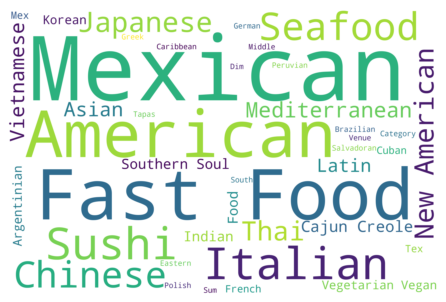

In [71]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(df_food_wc))
fig = plt.figure
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Setting Benchmarks by Assigning Weights to Venues

In [39]:
k = df_venues.copy(deep = True)
weights_dict={'Italian Restaurant':4,
'American Restaurant':4,
'Dessert Shop':2,
'Salad Place':2,
'BBQ Joint':3,
'Sandwich Place':3,
'Mexican Restaurant':4,
'Taco Place':3,
'Pizza Place':2.5,
'Snack Place':1.5,
'Thai Restaurant':4,
'Burger Joint':2.5,
'Restaurant':4,
'Chinese Restaurant':4,
'Southern / Soul Food Restaurant':4,
'Japanese Restaurant':4, 
'Seafood Restaurant':4,
'New American Restaurant':4,
'Brazilian Restaurant':4,
'Sushi Restaurant':4,
'Mediterranean Restaurant':4,
'Steakhouse':3.5,
'Fast Food Restaurant':4,
'Argentinian Restaurant':4,
'Fried Chicken Joint':3.0,
'Asian Restaurant':4,
'Vietnamese Restaurant':4,
'Cuban Restaurant':4,
'South Indian Restaurant':4,
'German Restaurant':4,
'Latin American Restaurant':4,
'Cajun / Creole Restaurant':4,
'Dim Sum Restaurant':4,
'Middle Eastern Restaurant':4,
'Greek Restaurant':4,
'Tex-Mex Restaurant':4,
'Tapas Restaurant':4,
'Peruvian Restaurant':4,
'Korean Restaurant':4,
'Indian Restaurant':4, 
'Caribbean Restaurant':4,
'Polish Restaurant':4,
'French Restaurant':4}
data = df_venues['Venue Category']
allVenues = list(data)

In [40]:
weights = []
for i in allVenues:
    if i in weights_dict.keys():
        weights.append(weights_dict[i])
    else :
        weights.append(0)
df_venues['weights'] = weights;
df_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
0,Houston,29.7866,-95.3909,A 2nd Cup,29.790951,-95.386718,Café,0.0
1,Houston,29.7866,-95.3909,Buchanan's Native Plants,29.791149,-95.391761,Flower Shop,0.0
2,Houston,29.7866,-95.3909,Coltivare Pizza & Garden,29.781629,-95.393936,Italian Restaurant,4.0
3,Houston,29.7866,-95.3909,Juiceland,29.781698,-95.392292,Juice Bar,0.0
4,Houston,29.7866,-95.3909,Barnaby's Cafe,29.781808,-95.389167,American Restaurant,4.0


#### Dropped the values with 0 weight 

In [41]:
df_venues.drop(df_venues[df_venues.weights < 1.0].index, inplace=True)
df_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
2,Houston,29.7866,-95.3909,Coltivare Pizza & Garden,29.781629,-95.393936,Italian Restaurant,4.0
4,Houston,29.7866,-95.3909,Barnaby's Cafe,29.781808,-95.389167,American Restaurant,4.0
5,Houston,29.7866,-95.3909,Red Dessert Dive & Coffee Shop,29.790216,-95.387939,Dessert Shop,2.0
8,Houston,29.7866,-95.3909,Salata,29.773528,-95.397887,Salad Place,2.0
9,Houston,29.7866,-95.3909,Pinkerton's Barbecue,29.798694,-95.381641,BBQ Joint,3.0


#### Calculating Mean and Grouping Venues by City

In [42]:
citywise_venues_weights = df_venues[['City','weights']].copy()
citywise_venues_weights_means = citywise_venues_weights.groupby(['City']).mean()
citywise_venues_weights_means = citywise_venues_weights_means.reset_index(drop=False)
citywise_venues_weights_means.head()

,City,weights
0,Abilene,3.730769
1,Allen,3.318182
2,Amarillo,3.666667
3,Arlington,3.708333
4,Austin,3.166667


In [43]:
city_selection = pd.merge(texas_df, citywise_venues_weights_means, on='City')
city_selection = city_selection[['City','Population density in Km2','weights']].copy()
city_selection.head()

,City,Population density in Km2,weights
0,Houston,"1,395/km2",2.954545
1,San Antonio,"1,250/km2",3.136364
2,Dallas,"1,493/km2",3.000000
3,Austin,"1,170/km2",3.166667
4,Fort Worth,962/km2,3.566667


#### Normalizing Data

In [44]:
k = city_selection.copy(deep = True)
k['Population density in Km2'] = k['Population density in Km2'].str.split("/", n = 0, expand = True)
k['Population density in Km2'] = k['Population density in Km2'].str.replace(',','')
k['Population density in Km2'] = k['Population density in Km2'].astype(float)
city_selection = k.copy(deep = True)
city_selection.head()

,City,Population density in Km2,weights
0,Houston,1395.0,2.954545
1,San Antonio,1250.0,3.136364
2,Dallas,1493.0,3.000000
3,Austin,1170.0,3.166667
4,Fort Worth,962.0,3.566667


In [45]:
from sklearn import preprocessing
column_names_to_normalize = ['Population density in Km2', 'weights']
x = city_selection[column_names_to_normalize].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
city_selection[column_names_to_normalize] = pd.DataFrame(x_scaled)
city_selection.head()

,City,Population density in Km2,weights
0,Houston,0.822971,0.000000
1,San Antonio,0.697755,0.187726
2,Dallas,0.907599,0.046931
3,Austin,0.628670,0.219013
4,Fort Worth,0.449050,0.632010


#### Determing the Suitable City

In [46]:
city_selection['sum'] = city_selection['Population density in Km2'] + city_selection['weights']
row_num = city_selection['sum'].argmax()
city_name = city_selection['City'].iloc[row_num]
city_name

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


'Irving'

In [50]:
row = df_venues.loc[df_venues['City'] == 'Irving'].index[0]
row

364

In [52]:
lat_city = df_venues['Latitude'].iloc[row]
long_city = df_venues['Longitude'].iloc[row]
print(lat_city, long_city)

32.9723 -96.7081


+ Since our Benchmarks are met so The best city to open a restaurant is **Irving**.  
Now lets find out the locality in Irving.

#### Using FourSquare API to get Venues in Irving, TX

In [54]:
def getNearbyVenues1(name, latitudes, longitudes, radius):
    
    LIMIT = 150       
        # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitudes, 
            longitudes, 
            radius, 
            LIMIT)
            
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
   # print(results)
    venues_list=[]
    venues_list.append([(name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],v['venue']['categories'][0]['name'])for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 'Latitude', 'Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category']
    return(nearby_venues)


city_venues = getNearbyVenues1(name = 'Irving', latitudes = lat_city ,longitudes = long_city, radius = 2500)
city_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Irving,31.4411,-100.4505,Mena's Tex-Mex Grill,32.974480,-96.713581,Mexican Restaurant
1,Irving,31.4411,-100.4505,Bawarchi Biryani Point,32.974016,-96.713409,Indian Restaurant
2,Irving,31.4411,-100.4505,Twisted Root Burger Co.,32.974890,-96.714395,American Restaurant
3,Irving,31.4411,-100.4505,First Watch,32.974861,-96.708544,Breakfast Spot
4,Irving,31.4411,-100.4505,Jersey Mike's Subs,32.974923,-96.715144,Sandwich Place


In [55]:
venues_in_city = city_venues.copy(deep = True)
venues_in_city.shape

(100, 7)

In [56]:
city_venues['Venue Category'].unique()

array(['Mexican Restaurant', 'Indian Restaurant', 'American Restaurant',
       'Breakfast Spot', 'Sandwich Place', 'Sushi Restaurant',
       'Dessert Shop', 'Coffee Shop', 'Mediterranean Restaurant',
       'Burger Joint', 'Bakery', 'Chinese Restaurant', 'Taco Place',
       'Fried Chicken Joint', 'Wings Joint', 'Garden Center',
       'Fast Food Restaurant', 'Smoothie Shop', 'Salad Place',
       'Soccer Stadium', 'Performing Arts Venue', 'Hotel',
       'Kitchen Supply Store', 'Japanese Restaurant', 'BBQ Joint',
       'Greek Restaurant', 'Park', 'Pizza Place', 'Plaza', 'Supermarket',
       'Golf Course', 'Café', 'Shipping Store', 'Bar',
       'Seafood Restaurant', 'Asian Restaurant', 'Gym / Fitness Center',
       'Pharmacy', 'Trail', 'Brewery', 'Athletics & Sports',
       'Convenience Store', 'Vietnamese Restaurant', 'Restaurant',
       'Playground', 'Baseball Field', 'Sports Bar', 'Gymnastics Gym',
       'Cajun / Creole Restaurant', 'Automotive Shop', 'Dry Cleaner',
       

#### Setting Benchmarks of Local Venues at Irving, TX

In [58]:
k = city_venues.copy(deep = True)
new_weightage_dict= {'Mexican Restaurant':4, 'Indian Restaurant':3.5, 'American Restaurant':4,
       'Breakfast Spot':2.5, 'Sandwich Place':2.5, 'Sushi Restaurant':3,
       'Dessert Shop':2, 'Coffee Shop':1.5, 'Mediterranean Restaurant':3,
       'Burger Joint':2, 'Bakery':1.5, 'Chinese Restaurant':3.5, 'Taco Place':2.5,
       'Fried Chicken Joint':2.5, 'Wings Joint':2.5, 'Garden Center':0.5,
       'Fast Food Restaurant':4, 'Smoothie Shop':1.5, 'Salad Place':2.5,
       'Soccer Stadium':3.5, 'Performing Arts Venue':3, 'Hotel':4,
       'Kitchen Supply Store':1.5, 'Japanese Restaurant':3, 'BBQ Joint':2.5,
       'Greek Restaurant':3, 'Park':3.5, 'Pizza Place':3.5, 'Plaza':4, 'Supermarket':3.5,
       'Golf Course':1, 'Café':1.5, 'Shipping Store':3.5, 'Bar':3.5,
       'Seafood Restaurant':4, 'Asian Restaurant':3.5, 'Gym / Fitness Center':3,
       'Pharmacy':0.5, 'Trail':0.5, 'Brewery':0.5, 'Athletics & Sports':0.5,
       'Convenience Store':1, 'Vietnamese Restaurant':2.5, 'Restaurant':2.5,
       'Playground':2.0, 'Baseball Field':2, 'Sports Bar':3.0, 'Gymnastics Gym':2.5,
       'Cajun / Creole Restaurant':2.5, 'Automotive Shop':0.5, 'Dry Cleaner':1.0,
       'Donut Shop':2}

#### Plotting Local Venues

In [59]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# create map of the venues that we have using latitude and longitudes
venues_map = folium.Map(location=[lat_city, long_city], zoom_start=15) # generate map centred around Jersey city

folium.features.CircleMarker(
    [lat_city, long_city],
    radius=10,
    popup='Irving',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

In [60]:
for lat, lng, label in zip(venues_in_city['Venue Latitude'], venues_in_city['Venue Longitude'], venues_in_city['Venue']):
    label=folium.Popup(label,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html = False).add_to(venues_map)
venues_map

In [61]:
allVenuesinCity1 = k['Venue Category']

f_weights1 = []
for i in allVenuesinCity1:
    if i in new_weightage_dict.keys():
        f_weights1.append(new_weightage_dict[i])
    else :
        f_weights1.append(0)
k['weights'] = f_weights1;
k.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
0,Irving,31.4411,-100.4505,Mena's Tex-Mex Grill,32.974480,-96.713581,Mexican Restaurant,4.0
1,Irving,31.4411,-100.4505,Bawarchi Biryani Point,32.974016,-96.713409,Indian Restaurant,3.5
2,Irving,31.4411,-100.4505,Twisted Root Burger Co.,32.974890,-96.714395,American Restaurant,4.0
3,Irving,31.4411,-100.4505,First Watch,32.974861,-96.708544,Breakfast Spot,2.5
4,Irving,31.4411,-100.4505,Jersey Mike's Subs,32.974923,-96.715144,Sandwich Place,2.5


In [62]:
newframe = k[['City','Venue Category','weights']].copy()
newframe = k.groupby(['Venue Category']).mean()
newframe.drop(columns = ["Latitude", "Longitude"], inplace = True)
newframe 

,Venue Latitude,Venue Longitude,weights
Venue Category,,,
American Restaurant,32.972455,-96.704263,4.0
Asian Restaurant,32.976161,-96.720230,3.5
Athletics & Sports,32.960972,-96.698432,0.5
Automotive Shop,32.973280,-96.681540,0.5
BBQ Joint,32.962071,-96.712042,2.5
Bakery,32.970573,-96.718297,1.5
Bar,32.973957,-96.699006,3.5
Baseball Field,32.951927,-96.697761,2.0
Breakfast Spot,32.964180,-96.712084,2.5


#### Clustering Venues

In [63]:
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
#Standardize
clmns = ['weights','Venue Latitude', 'Venue Longitude']
city_df_tr_std = stats.zscore(newframe[clmns])
#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(city_df_tr_std)
labels = kmeans.labels_
newframe['clusters'] = labels
#Add the column into our list
clmns.extend(['clusters'])
#Lets analyze the clusters
kframe = newframe[clmns].groupby(['Venue Category']).mean()
kframe = kframe.reset_index(drop = False)
kframe.head()

,Venue Category,weights,Venue Latitude,Venue Longitude,clusters
0,American Restaurant,4.0,32.972455,-96.704263,1
1,Asian Restaurant,3.5,32.976161,-96.720230,1
2,Athletics & Sports,0.5,32.960972,-96.698432,0
3,Automotive Shop,0.5,32.973280,-96.681540,2
4,BBQ Joint,2.5,32.962071,-96.712042,0


In [64]:
finalWeight = kframe.groupby(['clusters']).mean()
finalWeight

,weights,Venue Latitude,Venue Longitude
clusters,,,
0,1.416667,32.962017,-96.709660
1,3.044118,32.975230,-96.709309
2,1.166667,32.976368,-96.686289


In [65]:
# Coordinates with maximum weight
lat1 = 32.975230
long1 = -96.709309

#### Plotting the Most Suitable location within 100 m of radius

In [66]:
# create map of the venues that we have using latitude and longitudes
final_map = folium.Map(location=[lat1, long1], zoom_start=15)


# add prefered location in the City as a green circle mark
folium.features.CircleMarker(
    [lat1, long1],
    radius=100,
    popup='Restuarant can be opened within this circle',
    fill=True,
    color='green',
    fill_color='green',
    fill_opacity=0.6
    ).add_to(final_map)
final_map

#### Conclusion
+ Best City in Texas for opening restaurant - **Irving**
+ Best Restaurant Type **Mexican Restaurant**